In [1]:
import pandas as pd

def process_time(s):
    if 'Between' in s:
        numbers = [float(n) for n in s.split() if n.isdigit()]
        return sum(numbers) / len(numbers)
    elif 'More than' in s:
        number = float(s.split()[2]) + 0.2
        return number
    elif 'Less than an Hour':
        number = 0.9
        return number
    else:
        return s

data_fresh = pd.read_csv('/content/Empirical_dataset.csv')

# data_fresh.head()

# data_fresh['Processed Social Media Use'] = data_fresh['Average_Time spent per day'].apply(process_time)

# data_fresh[['Average_Time spent per day', 'Processed Social Media Use']].head()


# data_fresh.to_csv('/content/smmh (4).csv')

print(data_fresh.columns.tolist())

['S.NO', 'Timestamp', 'Age', 'Gender', 'Relationship Status', 'Occupation Status', 'Organization', 'Do you use social media?', 'Social_media_Platforms', 'Average_Time spent per day', 'Using Social Media without any purpose', 'Distracted by Social media when busy doing something', "Do you feel restless if you haven't used Social media in a while", 'Easily distracted', 'Bothered by worries', 'Difficulty in concentration', 'Compare with succesful people in socialmedia', 'What is your feeling about these comparisons', 'Seek validation from Apps', 'Depressed', 'Intrest fluctuation on daily activities', 'Sleep issues', 'Processed Social Media Use']


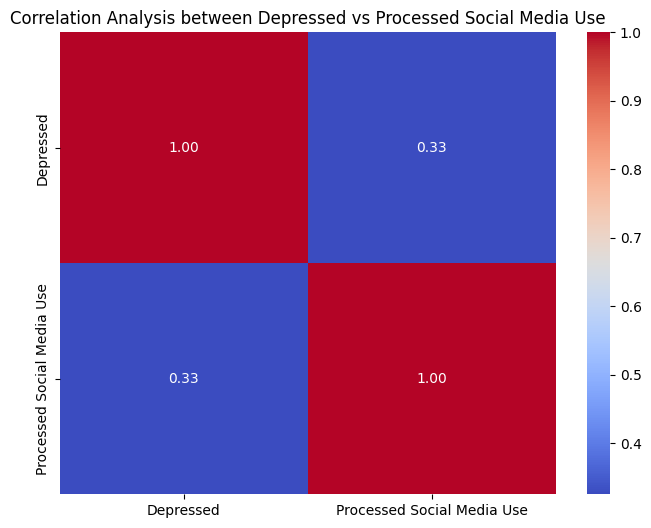

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = data_fresh[['Depressed', 'Processed Social Media Use']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Analysis between Depressed vs Processed Social Media Use')
plt.show()

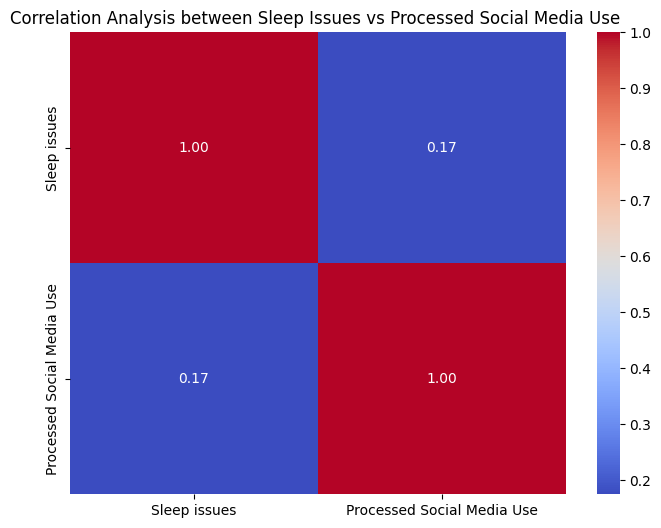

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = data_fresh[['Sleep issues', 'Processed Social Media Use']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Analysis between Sleep Issues vs Processed Social Media Use ')
plt.show()

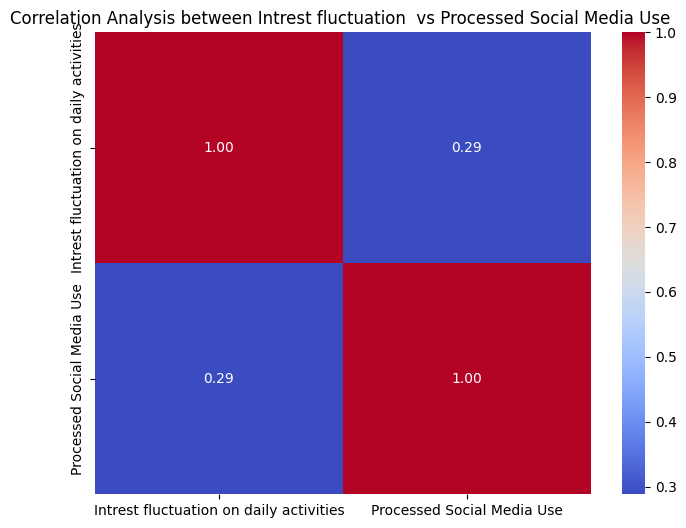

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = data_fresh[['Intrest fluctuation on daily activities', 'Processed Social Media Use']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Analysis between Intrest fluctuation  vs Processed Social Media Use ')
plt.show()

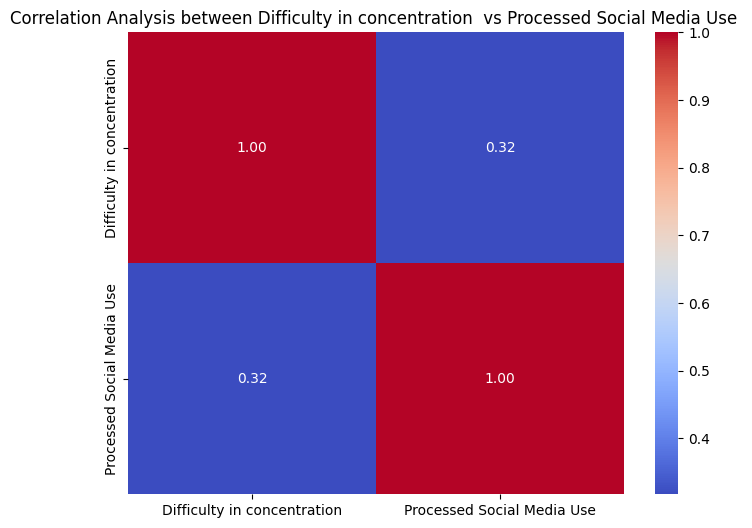

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = data_fresh[['Difficulty in concentration', 'Processed Social Media Use']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Analysis between Difficulty in concentration  vs Processed Social Media Use ')
plt.show()

<ipython-input-8-94f109a05403>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_fresh, x='Processed Social Media Use', y='Intrest fluctuation on daily activities', ci=None)


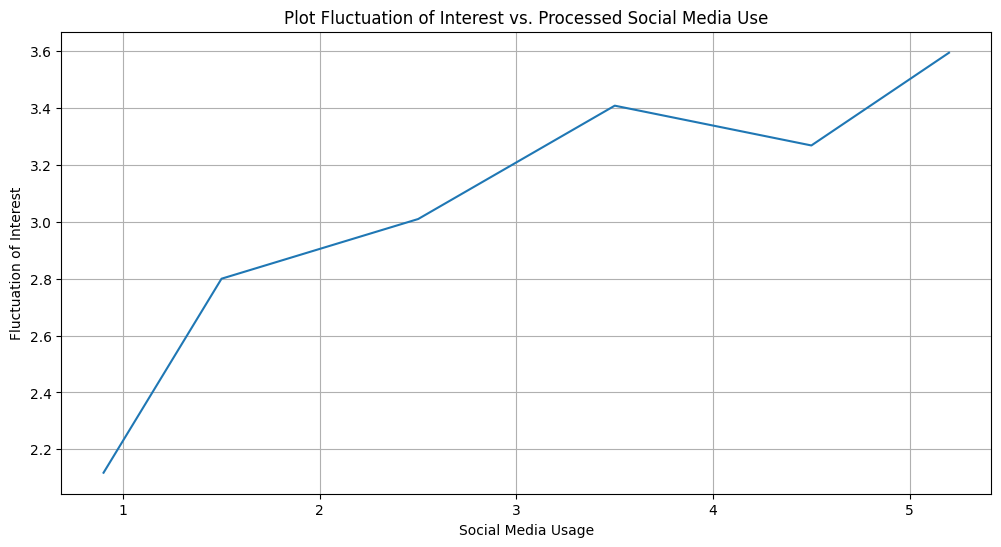

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_fresh, x='Processed Social Media Use', y='Intrest fluctuation on daily activities', ci=None)
plt.title('Plot Fluctuation of Interest vs. Processed Social Media Use')
plt.xlabel('Social Media Usage')
plt.ylabel('Fluctuation of Interest')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Social Media Usage by Gender')

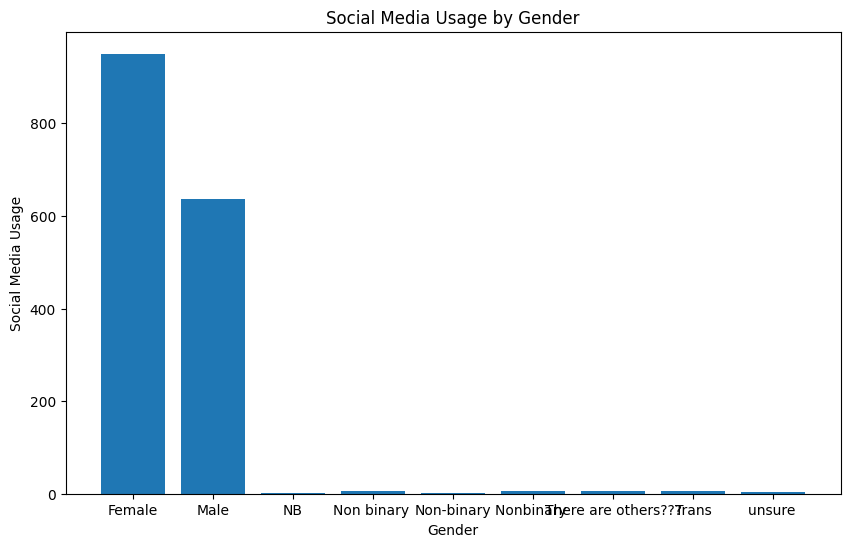

In [ ]:
df_grouped = data_fresh.groupby('Gender')['Processed Social Media Use'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(df_grouped['Gender'], df_grouped['Processed Social Media Use'])

plt.xlabel('Gender')
plt.ylabel('Social Media Usage')
plt.title('Social Media Usage by Gender')

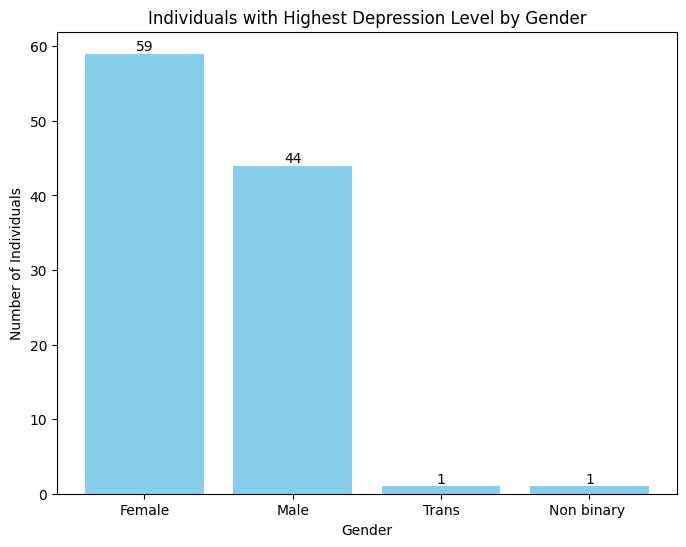

In [ ]:
import matplotlib.pyplot as plt

highest_depression = data_fresh[data_fresh['Depressed'] == 5]

depression_counts = highest_depression['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(depression_counts.index, depression_counts.values, color='skyblue')

plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.title('Individuals with Highest Depression Level by Gender')

for index, value in enumerate(depression_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [2]:
from scipy import stats

correlation = data_fresh['Age'].corr(data_fresh['Depressed'], method='pearson')
print(f'Pearson correlation coefficient between Age and Depression level: {correlation}')

Pearson correlation coefficient between Age and Depression level: -0.30358193932710104


In [5]:
correlation, p_value = stats.pearsonr(data_fresh['Age'], data_fresh['Depressed'])
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: -0.3035819393271012
P-value: 1.0322652547363996e-11


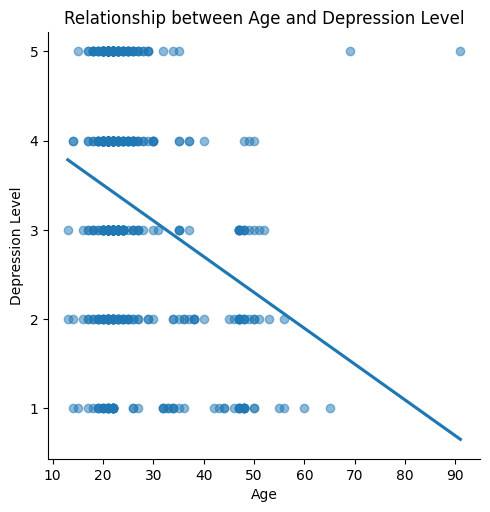

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.lmplot(x='Age', y='Depressed', data=data_fresh, ci=None, scatter_kws={'alpha':0.5})
plt.title('Relationship between Age and Depression Level')
plt.xlabel('Age')
plt.ylabel('Depression Level')
plt.show()

In [7]:
correlation = data_fresh['Age'].corr(data_fresh['Depressed'], method='pearson')
print(f'Pearson correlation coefficient between Age and Depression level: {correlation}')

Pearson correlation coefficient between Age and Depression level: -0.30358193932710104


In [8]:
def categorize_age(age):
    if 13 <= age <= 30:
        return 'Young Age Group'
    elif 31 <= age <= 55:
        return 'Middle Age Group'
    elif 56 <= age <= 91:
        return 'Old Age Group'
    else:
        return 'Out of Range'


data_fresh['Age Group'] = data_fresh['Age'].apply(categorize_age)

data_fresh.to_csv('Updated_age_categorize.csv', index=False)


print(data_fresh.head())

   S.NO           Timestamp   Age  Gender Relationship Status  \
0     0  4/18/2022 19:18:47  21.0    Male   In a relationship   
1     1  4/18/2022 19:19:28  21.0  Female              Single   
2     2  4/18/2022 19:25:59  21.0  Female              Single   
3     3  4/18/2022 19:29:43  21.0  Female              Single   
4     4  4/18/2022 19:33:31  21.0  Female              Single   

    Occupation Status Organization Do you use social media?  \
0  University Student   University                      Yes   
1  University Student   University                      Yes   
2  University Student   University                      Yes   
3  University Student   University                      Yes   
4  University Student   University                      Yes   

                              Social_media_Platforms  \
0  Facebook, Twitter, Instagram, YouTube, Discord...   
1  Facebook, Twitter, Instagram, YouTube, Discord...   
2            Facebook, Instagram, YouTube, Pinterest   
3     

In [13]:
from scipy.stats import chi2_contingency

df1 = pd.read_csv('/content/Updated_age_categorize.csv')

contingency_table = pd.crosstab(df1['Age Group'], df1['Depressed'])

# Perform the Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Counts: \n", expected)


Chi-square Statistic: 84.3009263534504
P-value: 6.6343981997000595e-15
Degrees of Freedom: 8
Expected Counts: 
 [[10.35343035 14.32224532 20.18918919 20.01663202 18.11850312]
 [ 0.74844075  1.03534304  1.45945946  1.44698545  1.30977131]
 [48.8981289  67.64241164 95.35135135 94.53638254 85.57172557]]


In [10]:
from scipy.stats import f_oneway

df1 = pd.read_csv('/content/Updated_age_categorize.csv')

group1 = df1[df1['Age Group'] == 'Young Age Group']['Depressed']
group2 = df1[df1['Age Group'] == 'Middle Age Group']['Depressed']
group3 = df1[df1['Age Group'] == 'Old Age Group']['Depressed']

f_stat, p_value = f_oneway(group1, group2, group3)

print(f"ANOVA results: F-statistic = {f_stat}, P-value = {p_value}")


ANOVA results: F-statistic = 41.2345962861577, P-value = 3.015782970073917e-17


         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2     meandiff p-adj   lower  upper  reject
----------------------------------------------------------------------
Middle Age Group   Old Age Group   0.3193 0.8084 -0.8884  1.527  False
Middle Age Group Young Age Group   1.3142    0.0   0.969 1.6594   True
   Old Age Group Young Age Group   0.9949 0.1157 -0.1803 2.1701  False
----------------------------------------------------------------------
Figure(1000x600)


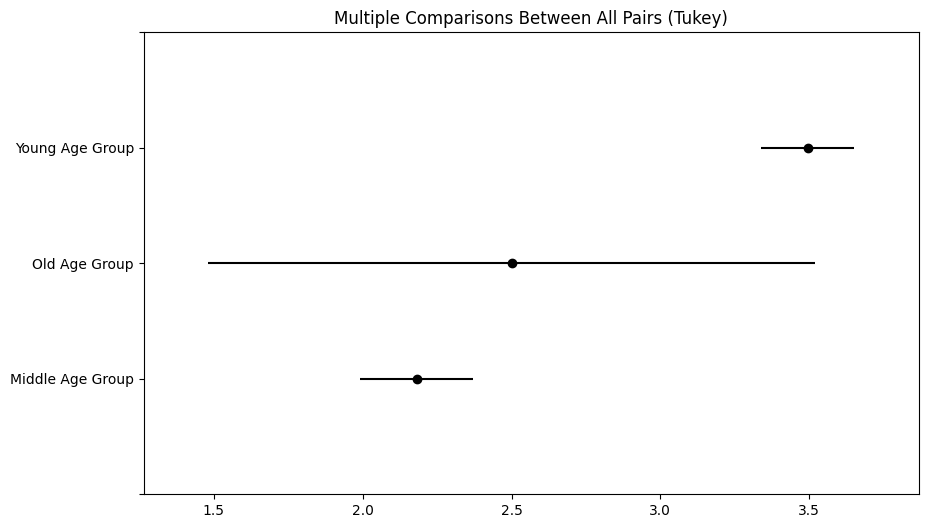

In [11]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

df = pd.read_csv('/content/Updated_age_categorize.csv')

df['Depressed'] = df['Depressed'].astype(float)

mc = MultiComparison(df['Depressed'], df['Age Group'])

result = mc.tukeyhsd()

print(result)
print(result.plot_simultaneous())
